<a href="https://colab.research.google.com/github/MarkusStefan/Economics/blob/main/Int_Macro_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Goods Market in an Open Economy

#(a) 
Download annual data for 2000–2021 for GDP (“GDP growth (annual %)”) and government expenditures G (“General government final consumption expenditure (annual % growth)”) for all available G20 countries from the [Worldbank homepage](https://data.worldbank.org/indicator/NE.CON.GOVT.KD.ZG?end=2021&start=2000&view=chart)

# Importing the Data
- modify it into a useful format

## GDP Growth rate (%$Δ$ per annum)

In [67]:
import pandas as pd

Y_growth = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Economics/main/GDP-growth.csv", 
                       skiprows=4)
Y_growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.98446,5.163873,4.583677,5.328044,...,4.229408,4.039082,2.895728,2.485952,2.639537,2.610797,2.038299,-3.042653,4.402447,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN


#### remove unnecessary columns & switch rows with cols (transposing)

In [68]:
Y_growth.columns[-23 :-1]

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [69]:
Y = Y_growth.iloc[:, -23:-1]
#Y = Y_growth[[Y_growth.columns[0]] + Y_growth.columns[-23:-1].tolist()]
Y.index = Y_growth.iloc[:, 0]
Y = Y.transpose()
#Y.rename({'Country Name':'Year'}, inplace=True)
Y.head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,7.616589,3.353978,NaN,3.743667,3.054624,6.946217,3.528362,6.565675,10.852704,-0.788999,...,NaN,6.787316,5.924809,4.514957,5.093045,NaN,6.181916,4.200000,3.897323,-3.059190
2001,4.195963,3.653224,NaN,5.217663,4.205999,8.293313,8.119358,1.700445,1.399085,-4.408840,...,NaN,6.192893,-3.397582,2.009203,7.390129,NaN,3.803646,2.700000,5.316868,1.439615
2002,-0.957771,3.905250,NaN,9.938149,13.665689,4.536524,4.546362,0.677285,2.433457,-10.894485,...,NaN,6.320821,-5.198319,2.304828,5.651959,NaN,3.935232,3.700374,4.506014,-8.894024
2003,1.120879,3.096045,8.832278,5.532113,2.990000,5.528637,8.694204,4.875144,8.800541,8.837041,...,-0.396081,6.899063,4.288335,3.109627,5.212629,NaN,3.747398,2.949075,6.944974,-16.995075
2004,7.281026,5.507315,1.414118,8.022838,10.950000,5.514668,8.135676,8.867132,9.566437,9.029573,...,3.285894,7.536411,3.987393,4.471241,3.087260,NaN,3.972696,4.554560,7.032395,-5.807538


## Government Spending Growth Rate (%$Δ$ per annum)


In [70]:
G_growth = pd.read_csv("https://raw.githubusercontent.com/MarkusStefan/Economics/main/Gov-Exp-Growth.csv", 
                       skiprows=4)
G_growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.583212,0.892665,0.695295,1.701296,1.394648,-0.306185,0.864823,-1.033105,3.328975,NaN
2,Afghanistan,AFG,General government final consumption expenditu...,NE.CON.GOVT.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#G = G_growth[[G_growth.columns[0]] + G_growth.columns[-23:-1].tolist()]
G = G_growth.iloc[:, -23:-1]
G.index = G_growth.iloc[:, 0]
G = G.transpose()
#G.index = pd.to_datetime(G.index)
G.head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,NaN,3.837814,NaN,3.381122,NaN,-9.980737,NaN,NaN,NaN,0.577056,...,NaN,5.013236,NaN,2.347248,NaN,NaN,NaN,2.928539,NaN,NaN
2001,NaN,5.070166,NaN,2.835954,NaN,9.699439,NaN,2.812280,NaN,-2.069403,...,NaN,6.604552,NaN,2.783861,NaN,NaN,NaN,3.122488,NaN,NaN
2002,NaN,5.678363,NaN,10.300300,NaN,5.326795,NaN,2.316918,4.835270,-5.078139,...,NaN,5.383028,NaN,2.919951,NaN,NaN,NaN,4.571452,NaN,NaN
2003,NaN,6.841391,NaN,-2.803095,3.99,-0.717265,NaN,3.983752,4.551820,1.460822,...,-10.787172,7.186416,-0.751554,2.150280,NaN,NaN,NaN,5.653557,NaN,NaN
2004,NaN,5.220011,NaN,83.959748,2.10,4.323646,NaN,5.267591,-1.710161,2.718001,...,2.178649,7.774239,-1.951362,2.200369,NaN,NaN,NaN,5.237397,NaN,NaN


### Selecting G20 countries only

In [72]:
G20_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'European Union', 
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 
       'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 
       'United Kingdom', 'United States']
G20_list

['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'South Korea',
 'Turkey',
 'United Kingdom',
 'United States']

In [73]:

# compute the intersection to see which countries are available in the data sets
G20 = set(G20_list) & set(Y.columns.tolist()) & set(G.columns.tolist())
# countries member of G20 but not available
na = set(G20_list) - G20
print(f"G20-members not available:\t %s" %([c for c in na]))

G20-members not available:	 ['South Korea', 'Russia', 'Turkey']


In [74]:
# another option without using set theory
'''
for i, country in enumerate(G20):
  if (country not in Y.columns.tolist()) or (country not in G.columns.tolist()):
    print(i, country)
    G20.pop(i)
'''

'\nfor i, country in enumerate(G20):\n  if (country not in Y.columns.tolist()) or (country not in G.columns.tolist()):\n    print(i, country)\n    G20.pop(i)\n'

In [75]:
G20 = list(G20)
# removing China due to NaN values
G20.remove('China')
Y = Y[G20]
G = G[G20]
Y; G

Country Name,Japan,Italy,Australia,European Union,Germany,France,Mexico,Indonesia,Argentina,South Africa,Canada,United States,Saudi Arabia,Brazil,United Kingdom,India
2000,3.875614,3.377067,3.128173,2.327141,1.614530,1.802429,3.120501,6.491007,0.577056,2.928539,3.436845,1.536644,NaN,-0.151267,3.288287,1.375864
2001,2.383217,5.503719,1.881889,2.295811,0.546178,1.034593,-2.728948,7.563695,-2.069403,3.122488,3.405534,3.558214,1.172138,2.615923,4.298386,2.353301
2002,1.907115,1.342463,3.384297,2.162991,1.209877,1.799211,0.344518,12.993466,-5.078139,4.571452,2.261831,3.836841,-0.769101,3.816324,4.093983,-0.185249
2003,1.866354,1.400595,2.784632,1.747123,0.731886,1.931887,-0.155426,10.033662,1.460822,5.653557,2.880214,1.714172,3.964854,1.596563,4.477542,2.775859
2004,1.088920,0.636106,4.476536,1.272137,-0.593364,2.181523,-0.971080,3.990437,2.718001,5.237397,1.875095,1.538856,7.961696,3.876037,4.220310,3.975792
2005,0.793558,0.564513,3.051894,1.570358,0.596906,1.262635,2.255791,6.635241,9.855435,1.079029,1.063641,0.837527,8.731266,2.010945,2.409035,8.822174
2006,0.224077,-0.470866,3.064630,2.097503,1.114070,1.343145,2.707571,9.610453,3.722523,3.767475,2.751493,1.220054,7.987029,3.560799,2.087637,4.053400
2007,1.487909,0.508598,3.087954,2.053911,1.700598,1.817838,1.822830,3.893873,7.829779,6.204136,2.374963,1.601800,1.792239,4.069147,1.344221,9.424665
2008,-0.088055,1.324224,3.101106,2.622189,3.721151,1.136677,2.926328,10.428277,5.015078,7.671208,3.761145,2.450536,3.685283,2.045040,2.034574,11.364017
2009,1.969584,-0.085262,4.135722,2.324455,3.156221,2.408420,2.939431,15.674945,5.634254,1.765739,2.696630,4.261579,0.600812,2.945168,1.398981,14.190386


#(b) 
For each of the countries you should calculate the correlation between GDP and G in the following ways:


- Function for computing the correlation between the two Data Frames

In [76]:
def correlation(df1, df2, table=False):
  if df1.columns.tolist() != df2.columns.tolist():
    return "unbalanced dataframes!"

  corr_l = []
  if table:
    print("%39s - %s\n" %(df1.index[0], df2.index[-1]))
  for i, col in enumerate(df1.columns.tolist()):
    corrcoef = df1[col].corr(df2[col])
    corr_l.append(corrcoef)
    if not table:
      continue
    if corrcoef < 0:
      print("%20s: corr(Y,G)\t\t=\t%s" %(col, round(corrcoef,6)))
    else: 
      print("%20s: corr(Y,G)\t\t=\t %s" %(col, round(corrcoef,6)))
  if not table:
    return corr_l

#correlation(Y, G)

## (i) 
calculate the correlation between GDP and G for the years 2000–2019


In [77]:
# remove the last 2 years (2021, 2020)
Y_, G_ = Y.iloc[:-2, :], G.iloc[:-2, :]
Y_.tail(3)

Country Name,Japan,Italy,Australia,European Union,Germany,France,Mexico,Indonesia,Argentina,South Africa,Canada,United States,Saudi Arabia,Brazil,United Kingdom,India
2017,1.675332,1.667859,2.282184,2.838481,2.680231,2.291420,2.113129,5.069786,2.818503,1.157947,3.039880,2.241921,-0.741528,1.322869,2.443570,6.795383
2018,0.584068,0.925811,2.883045,2.065953,0.981233,1.865066,2.194995,5.174292,-2.617396,1.522329,2.777041,2.945385,2.514166,1.783667,1.705021,6.453851
2019,-0.240351,0.483198,2.171396,1.805107,1.056604,1.842972,-0.199048,5.019288,-2.000861,0.303453,1.879592,2.294439,0.333781,1.220778,1.604309,3.737919


In [78]:
correlation(Y_, G_, table=True)

                                   2000 - 2019

               Japan: corr(Y,G)		=	 0.065741
               Italy: corr(Y,G)		=	 0.444705
           Australia: corr(Y,G)		=	 0.174664
      European Union: corr(Y,G)		=	 0.071709
             Germany: corr(Y,G)		=	-0.191371
              France: corr(Y,G)		=	-0.287227
              Mexico: corr(Y,G)		=	 0.291548
           Indonesia: corr(Y,G)		=	-0.297185
           Argentina: corr(Y,G)		=	 0.640378
        South Africa: corr(Y,G)		=	 0.45519
              Canada: corr(Y,G)		=	-0.064836
       United States: corr(Y,G)		=	-0.335078
        Saudi Arabia: corr(Y,G)		=	 0.44881
              Brazil: corr(Y,G)		=	 0.664405
      United Kingdom: corr(Y,G)		=	 0.197977
               India: corr(Y,G)		=	 0.304637


## (ii) 
calculate the correlation between GDP and G for the years 2000–2021

In [79]:
correlation(Y, G, table=True)

                                   2000 - 2021

               Japan: corr(Y,G)		=	-0.031345
               Italy: corr(Y,G)		=	 0.367176
           Australia: corr(Y,G)		=	-0.309994
      European Union: corr(Y,G)		=	 0.329105
             Germany: corr(Y,G)		=	-0.277395
              France: corr(Y,G)		=	 0.794815
              Mexico: corr(Y,G)		=	 0.328518
           Indonesia: corr(Y,G)		=	 0.100947
           Argentina: corr(Y,G)		=	 0.686343
        South Africa: corr(Y,G)		=	 0.389527
              Canada: corr(Y,G)		=	 0.330381
       United States: corr(Y,G)		=	-0.29669
        Saudi Arabia: corr(Y,G)		=	 0.401241
              Brazil: corr(Y,G)		=	 0.73931
      United Kingdom: corr(Y,G)		=	 0.766816
               India: corr(Y,G)		=	 0.21929


## (iii) 
briefly discuss the obtained results

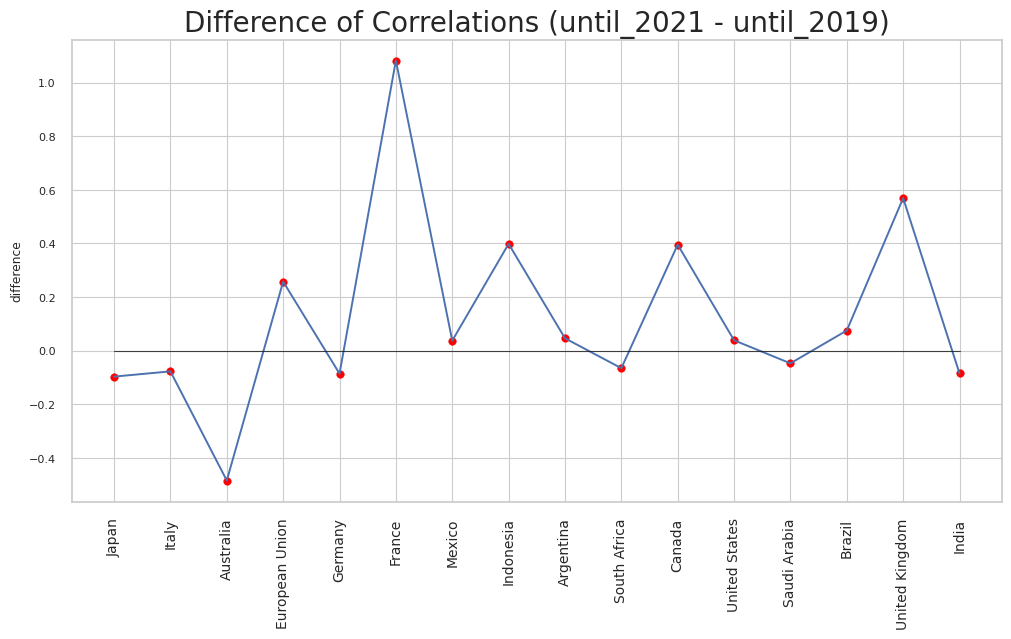

In [150]:
import matplotlib.pyplot as plt

# difference between correlations 2021 - 2019
corr21, corr19 = correlation(Y, G, table=False), correlation(Y_, G_, table=False)
diff = [x21-x19 for x21, x19 in zip(
    corr21, corr19)
]
plt.figure(figsize=(12,6))
plt.plot(Y.columns, diff)
plt.plot(Y.columns, [0]*len(Y.columns), color='k', linestyle='solid', linewidth=0.8, alpha=0.8)
plt.scatter(Y.columns, diff, color='red')
plt.xticks(rotation = 90, size=10)
plt.ylabel('difference')
plt.title('Difference of Correlations (until_2021 - until_2019)', size=20)
plt.show()

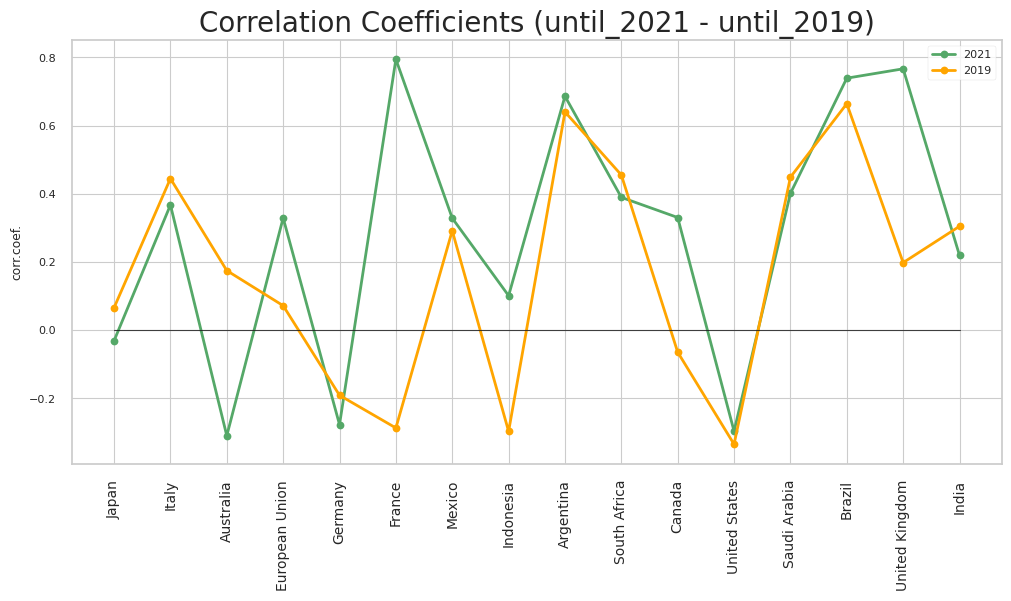

In [152]:
plt.figure(figsize=(12,5.5))
plt.plot(Y.columns, correlation(Y, G), color='g', linewidth=2, marker='o')
plt.plot(Y_.columns, correlation(Y_, G_), color='orange', linewidth=2, marker='o')
plt.plot(Y.columns, [0]*len(Y.columns), color='k', linestyle='solid', linewidth=0.8, alpha=0.8)
plt.xticks(rotation = 90, size=10)
plt.ylabel('corr.coef.')
plt.title('Correlation Coefficients (until_2021 - until_2019)', size=20)
plt.legend(['2021','2019'])
plt.show()

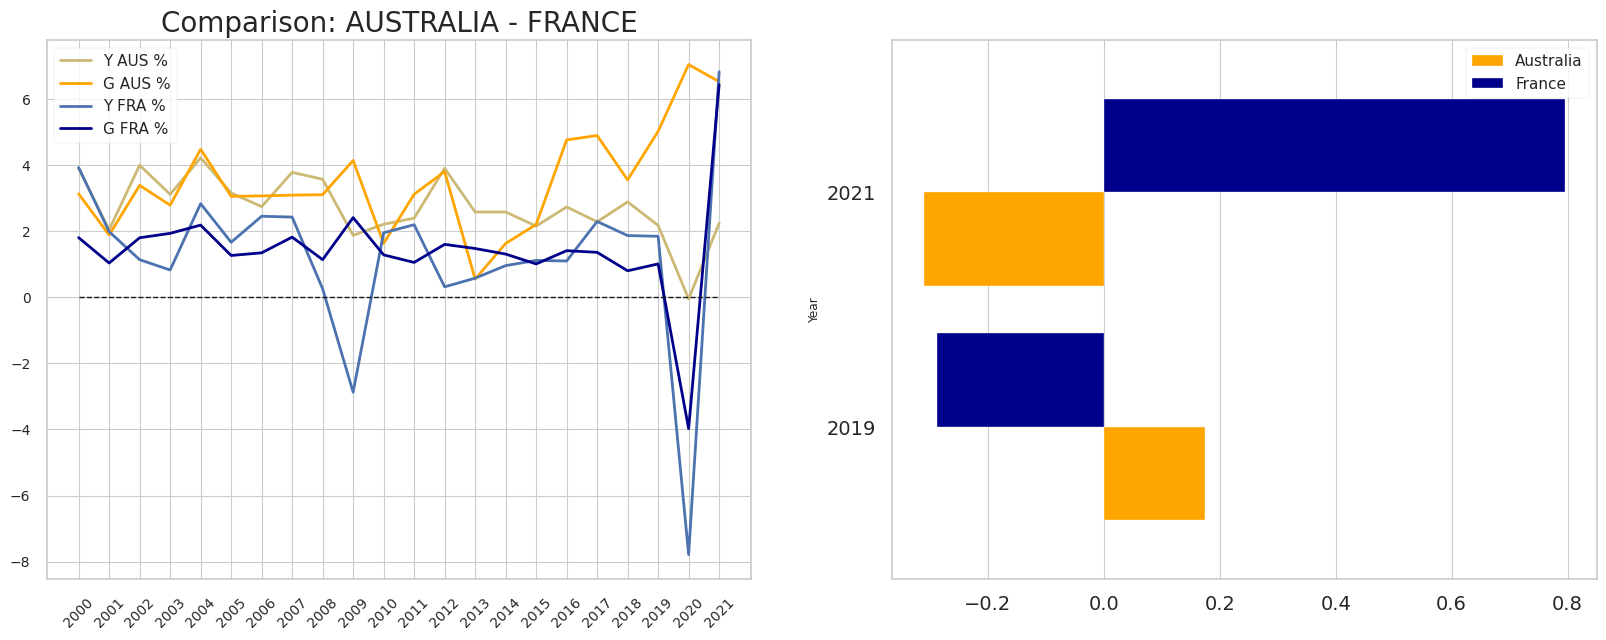

In [142]:
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(1,2, figsize=(20,7))
lwd = 2
tick_lab_size=14

ax[0].plot(Y.index, Y['Australia'], color='y', linewidth=lwd)
ax[0].plot(G.index, G['Australia'], color='orange', linewidth=lwd)

ax[0].plot(Y.index, Y['France'], color='b', linewidth=lwd)
ax[0].plot(G.index, G['France'], color='darkblue', linewidth=lwd)

lgnd = ['Y AUS %', 'G AUS %', 'Y FRA %', 'G FRA %']
ax[0].legend(lgnd, prop={'size':11})
ax[0].plot(Y.index, [0]*len(Y.index), color='k', linestyle='dashed', linewidth=1)
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='both', labelsize=tick_lab_size-4)
ax[0].set_title('Comparison: AUSTRALIA - FRANCE', size=20)

################################################################################
change_cor = pd.DataFrame({
    'Year' : [2019, 2021],
    'Australia' : [correlation(Y_,G_)[2], correlation(Y,G)[2]],
    'France' : [correlation(Y_,G_)[5], correlation(Y,G)[5]]
})
change_cor.set_index('Year', inplace=True)

change_cor.plot(kind='barh', ax=ax[1], color=('orange', 'darkblue'), width=0.8)
ax[1].legend(change_cor.columns, prop={'size':11})
ax[1].tick_params(axis='both', labelsize=tick_lab_size)
ax[1].grid(axis='y')
plt.show()

<!-- From the above plot we can see that increased Government Spending prevented GDP growth from becoming negative in Australia, but it went down regardless. In France, reduced Government Spending came along with a significant drop in GDP growth in 2020. The tremendous changes in terms of correlation between 2000-2019 & 2000-2021 are caused by the affects of the Covid-19 crisis. Surprisingly, the year 2020 and 2021 amplified the curves so much that it switched around the correlation. -->

From a slight negative correlation in France, the correlation between Y and G became positive. If we look at the graph, both variables drop in 2020, and both rise at a high rate in 2021, ultimately causing a positive correlation over the period from 2000-2021. Conversely, Australia's correlation between Y and G was, prior to Covid-19, weakly positive. Taking into account 2020 and 2021, the correlation suddenly decline, eventually becomes negative, as Australia apparently raised Government Spending to fight against the threatened depression phase, but the GDP growth unsurprisingly did not rise. Compared to France, we see that the raise in G might have hedged the GDP growth from plummeting drastically. Additionally, G was reduced in 2021, but as the economy slowly recovered, GDP growth eventually became positive; hence, the negative correlation for Australia.


The results imply:

1) **France**
- correlation for Australia was positive before Covid-19 hit 
- once Covid-19 arose, the correlation suddenly drops drastically
- this indicates, that the increase in government spending lead to a decrease in domestic output for Australia

2) **Australia**
- correlation for France was negative before Covid-19, indicating that a plus in government spending resulted in a lower growth rate
- taking into account the Covid-affected years, the government spending had a positive effect on doestic output

Accordingly, increased Government spending had a strongly negative impact on GDP growth in Australia. Conversely, in France, it was highly effective to stimulate the economy after the Covid-19 crisis.
The relationship between government deficit spending and GDP growth is of extreme importance for economic policy making, especially in times of economic downturns as has been experienced in the US and around the world in recent years. There are studies arguing that deficit spending has an adverse effect on the GDP by way of increasing the interest rate and hindering business investment1. Other studies argue for deficit spending at a time of recession as being beneficial in that it spurs demand and has no effect on interest rate.

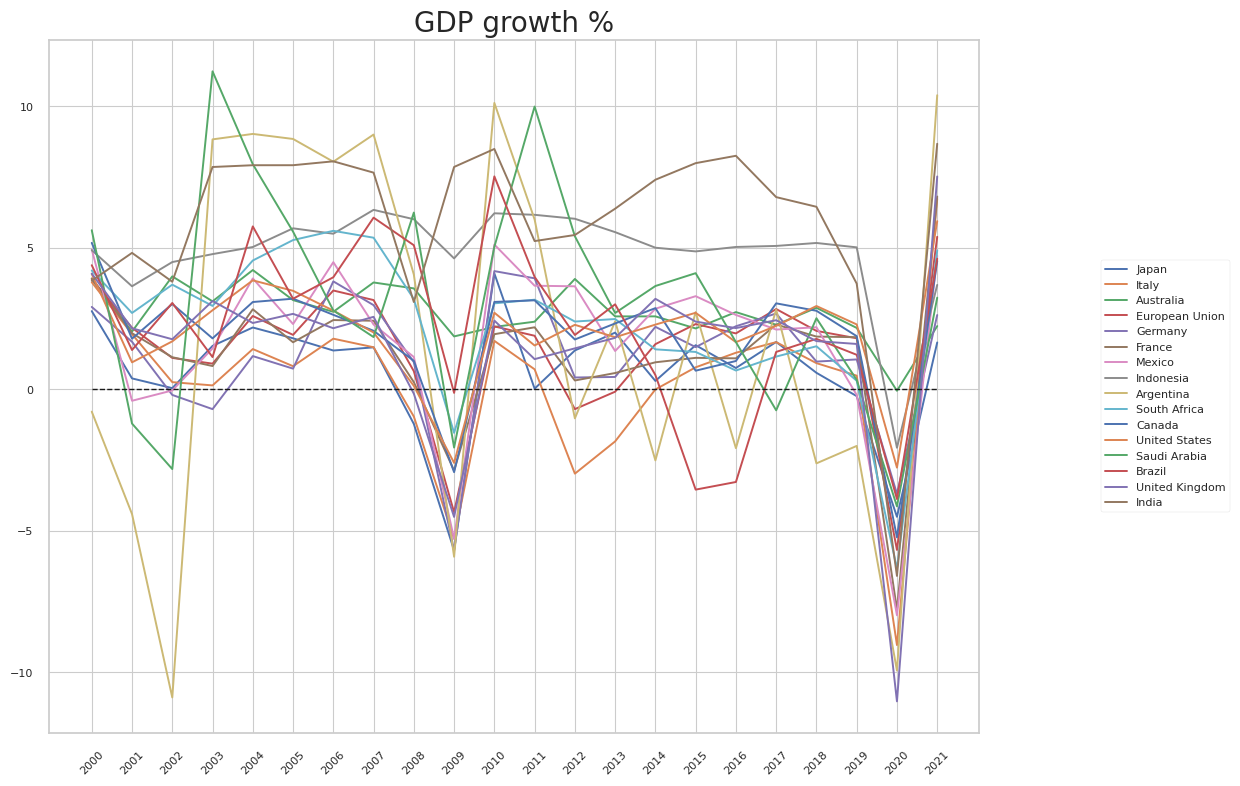

In [83]:
plt.figure(figsize=(12,9))
for c in Y.columns:
  plt.plot(Y.index, Y[c])

plt.legend(Y.columns, bbox_to_anchor=(1.2, 0.5), loc='center')
plt.plot(Y.index, [0]*len(Y.index), color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=45)
plt.title('GDP growth %', size=20)
plt.show()

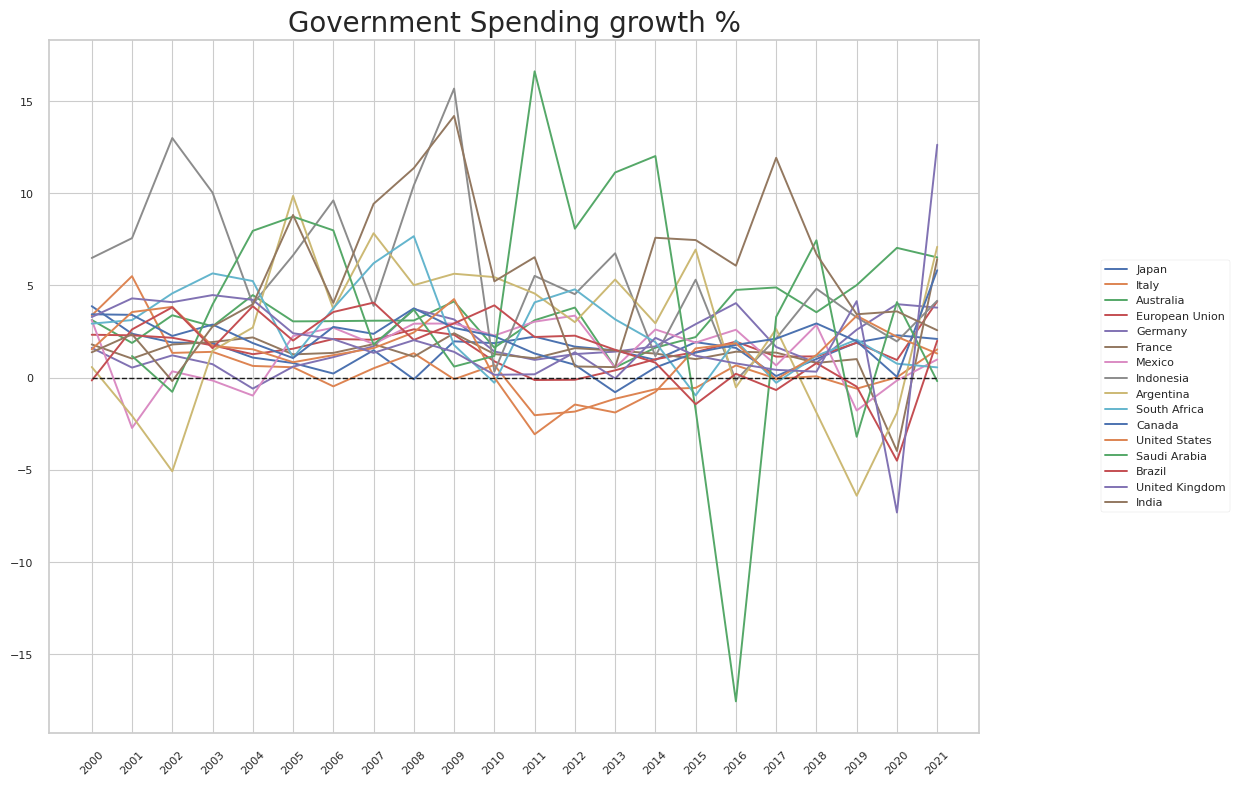

In [84]:
plt.figure(figsize=(12,9))
for c in G.columns:
  plt.plot(G.index, G[c])

plt.legend(G.columns, bbox_to_anchor=(1.2, 0.5), loc='center')
plt.plot(Y.index, [0]*len(Y.index), color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=45)
plt.title('Government Spending growth %', size=20)
plt.show()

# c) 
Generate a scatter plot (including the “linear trend line”) for the country with the highest positive and for the country with the highest negative correlation in (b)(ii).

- highest corr: France
- lowest (negative) corr: Australia

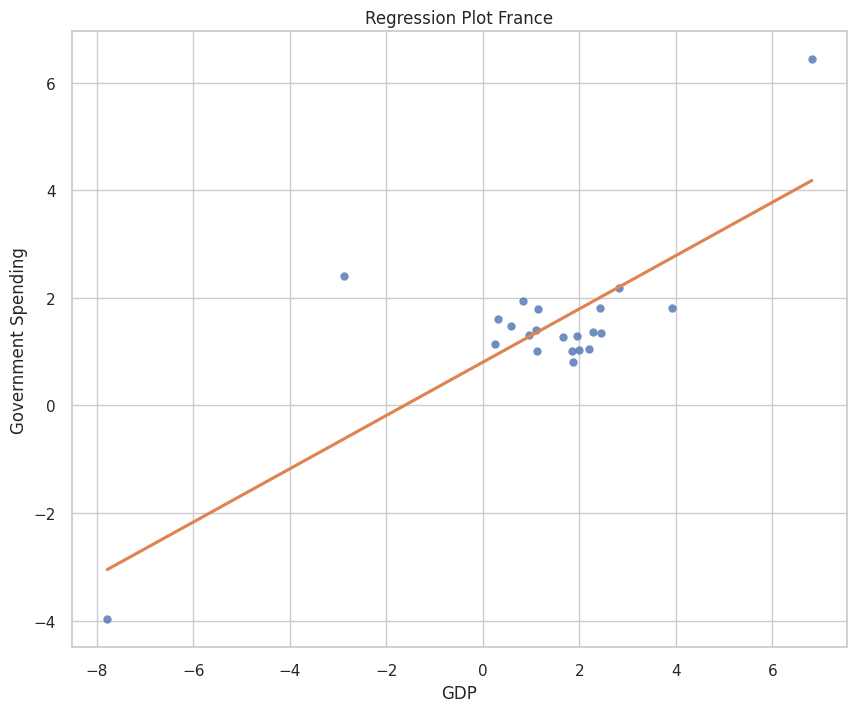

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.set(style='whitegrid')

#sns.scatterplot(x=Y['France'], y=G['France'])

reg = sns.regplot(x=Y['France'], y=G['France'], ci=None, line_kws={"color": "C1"})
plt.xlabel('GDP'); plt.ylabel('Government Spending'); plt.title('Regression Plot France')
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression
import numpy as np

# predictor must be 2d-array: n rows, 1 col
x = np.array(Y['France']).reshape((-1, 1))
# dependent var must be 1d-array
y = np.array(G['France'])

lm = LinearRegression
model = lm().fit(x, y)
print("France\nbeta_0: ",model.intercept_,"\nbeta_1: ", model.coef_[0])

France
beta_0:  0.8035085846787379 
beta_1:  0.4951535822840283


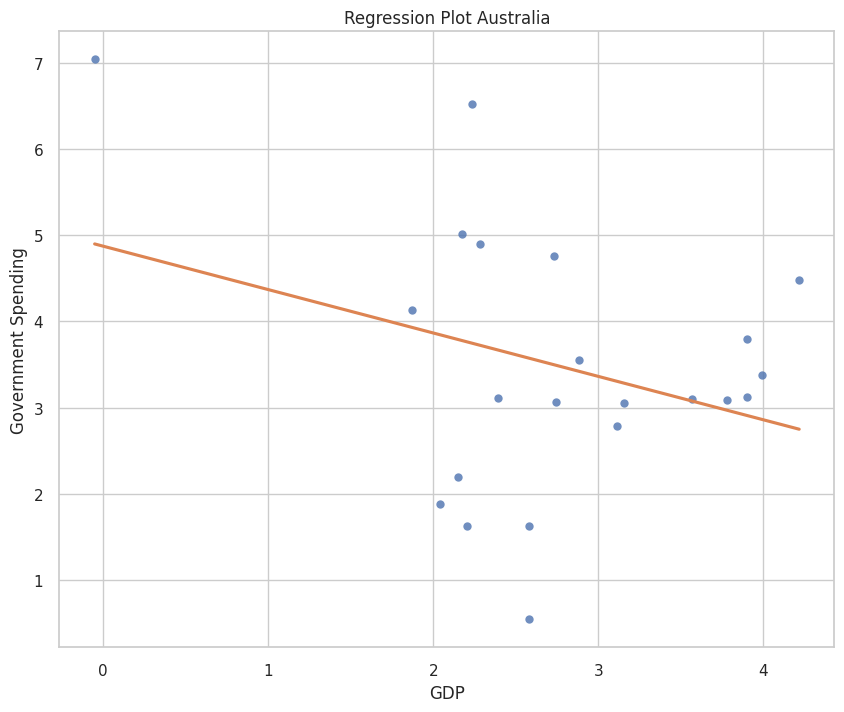

In [87]:
plt.figure(figsize=(10,8))

sns.set(style='whitegrid')

#sns.scatterplot(x=Y['France'], y=G['France'])

reg = sns.regplot(x=Y['Australia'], y=G['Australia'], ci=None, line_kws={"color": "C1"})
plt.xlabel('GDP'); plt.ylabel('Government Spending'); plt.title('Regression Plot Australia')
plt.show()

In [88]:
# 2d-array: n rows, 1 col
x = np.array(Y['Australia']).reshape((-1, 1))
# dependent var must be 1d-array
y = np.array(G['Australia'])

lm = LinearRegression
model = lm().fit(x, y)
print("Australia\nbeta_0:  ",model.intercept_,"\nbeta_1: ", model.coef_[0])

Australia
beta_0:   4.872819490266192 
beta_1:  -0.5031734863101462
